In [1]:
import pandas as pd
import numpy as np  # NumPy 추가
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('C:/Users/diqqo/OneDrive/바탕 화면/WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# TotalCharges 열의 빈 문자열을 NaN으로 대체하고, NaN 값을 평균값으로 대체
data['TotalCharges'].replace(' ', np.nan, inplace=True)
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

In [5]:
# 범주형 변수를 숫자형으로 변환
le = LabelEncoder()
data['gender'] = le.fit_transform(data['gender'])
data['Partner'] = le.fit_transform(data['Partner'])
data['Dependents'] = le.fit_transform(data['Dependents'])
data['PhoneService'] = le.fit_transform(data['PhoneService'])
data['MultipleLines'] = le.fit_transform(data['MultipleLines'])
data['InternetService'] = le.fit_transform(data['InternetService'])
data['OnlineSecurity'] = le.fit_transform(data['OnlineSecurity'])
data['OnlineBackup'] = le.fit_transform(data['OnlineBackup'])
data['DeviceProtection'] = le.fit_transform(data['DeviceProtection'])
data['TechSupport'] = le.fit_transform(data['TechSupport'])
data['StreamingTV'] = le.fit_transform(data['StreamingTV'])
data['StreamingMovies'] = le.fit_transform(data['StreamingMovies'])
data['Contract'] = le.fit_transform(data['Contract'])
data['PaperlessBilling'] = le.fit_transform(data['PaperlessBilling'])
data['PaymentMethod'] = le.fit_transform(data['PaymentMethod'])
data['Churn'] = le.fit_transform(data['Churn'])

### 선형 회귀

In [6]:
# 입력 변수와 출력 변수 선택
X = data.drop(columns=['customerID', 'TotalCharges'])
y = data['TotalCharges']

In [31]:
# 데이터 분할: 훈련 세트와 테스트 세트로
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=65)

In [32]:
# 선형 회귀 모델 생성
model = LinearRegression()

In [33]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [34]:
# 테스트 세트로 예측
y_pred = model.predict(X_test)

In [35]:
# 성능 측정 (평균 제곱 오차 계산)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 477213.38641632703


In [12]:
# 학습된 모델의 계수 확인
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [  18.89300761  -21.96997668   20.0290162   -33.36742896   59.91881719
  -42.87258241   40.52242375  -15.7471431   108.39822     133.34511803
  102.17976454  102.39733342   40.18552833   47.58313804  -76.5376819
    1.25526002   48.60764031   35.08170624 -167.35814752]
Intercept: -2363.7565926509164


In [13]:
# 특성(feature)의 중요도(계수) 확인
feature_importance = pd.Series(model.coef_, index=X.columns)
sorted_importance = feature_importance.sort_values()

In [14]:
import matplotlib.pyplot as plt 

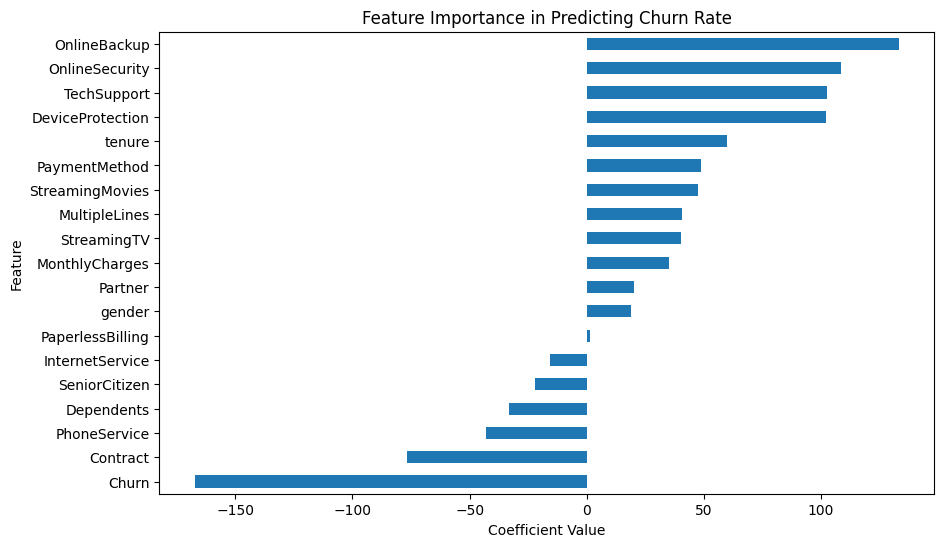

In [15]:
# 특성의 중요도 시각화
plt.figure(figsize=(10, 6))
sorted_importance.plot(kind='barh')
plt.title('Feature Importance in Predicting Churn Rate')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

계수가 양수인 특성은 이탈률을 증가시키는 데 기여하는 반면, 계수가 음수인 특성은 이탈률을 감소시키는 데 기여한다. 

Text(0.5, 1.0, 'Actual vs. Predicted')

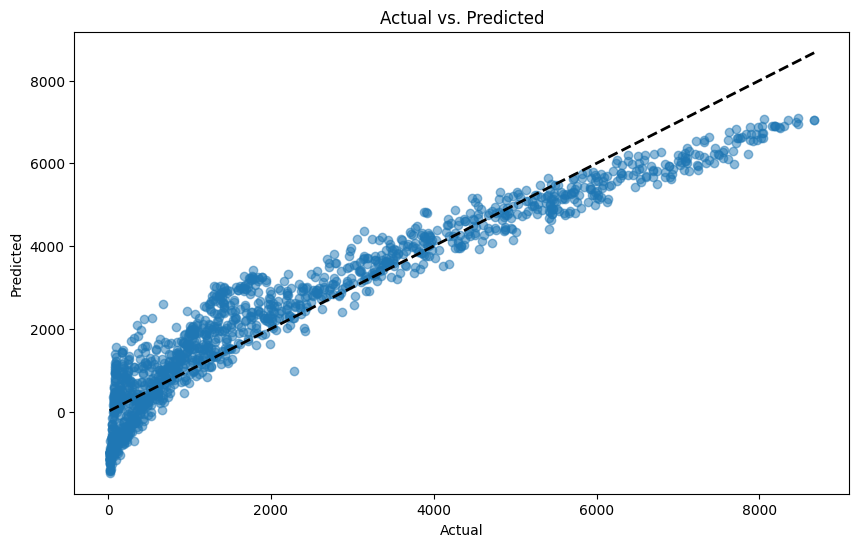

In [16]:
# 실제 값 대 예측 값 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')

Text(0.5, 1.0, 'Residuals vs. Predicted')

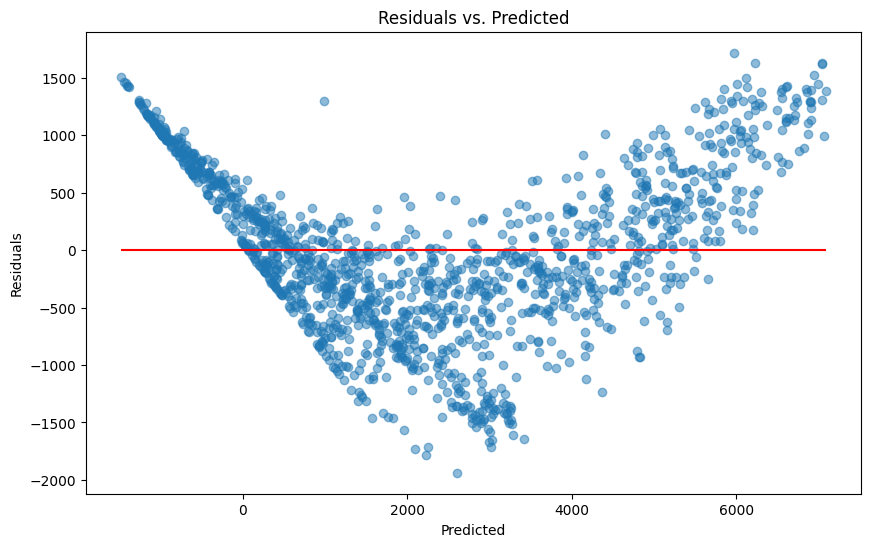

In [17]:
# 잔차 플롯
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted')


### 클러스터링

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [19]:
# 범주형 변수를 숫자형으로 변환
data = pd.get_dummies(data)

In [20]:
# 데이터 정규화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data) 

In [21]:
# PCA를 사용하여 차원 축소
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [22]:
# K-means 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_data)
cluster_labels = kmeans.labels_


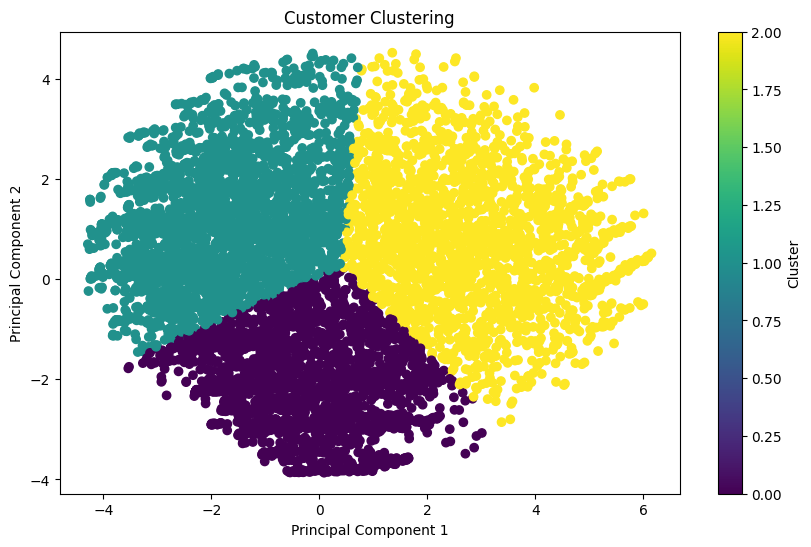

In [23]:
# 클러스터링 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Customer Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

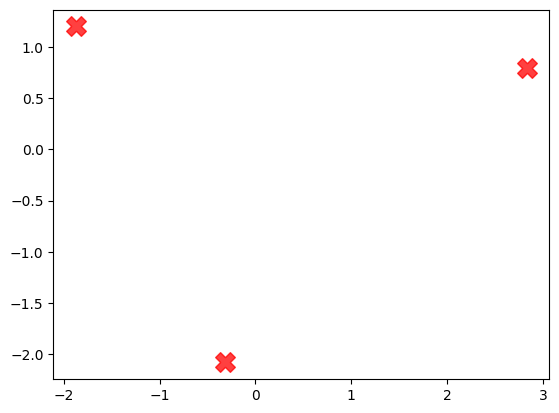

In [24]:
# 클러스터 중심 표시
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')